<a href="https://colab.research.google.com/github/srezazad/A-conjecture-on-Lyapanov-exponent/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A conjecture on Lyapanov exponent 

Fix $0<\alpha<1$ and $a_1,\cdots,a_m\in \mathbb{R}^d$ such that $\Vert a_i\Vert \leq \alpha$ for all $i\in [m]$. Set 
\begin{equation}
    X_i := I-a_ia_i^T.
\end{equation}

Note that the parameter $\alpha$ plays the role of the step-size in optimization problems which can be chosen by the user. 
Define  the random variables $\{Z_n\}_{n=0}^{\infty}$ as follows. 
\begin{equation}
    Z_n:=X_{i}Z_{n-1} \quad \text{ where } i \sim Unif[m].
\end{equation}
By convention, $Z_0=I$. We define 
\begin{equation}
    \ell(v):=\lim_{n\to +\infty} \frac{1}{n}\log \Vert Z_n(v)\Vert.
\end{equation}
Lemma: Suppose that $\ell(v_1)<\cdots \ell(v_s)$ for $v_1,\cdots,v_k\in \mathbb{R}^n$. Then it holds that $v_1,\cdots,v_k$ are linearly independent. In particular, the set of $\{\ell(v): v \in \mathbb{R}^d\}$ is a finite set. 
For every $v\in \mathbb{R}^d$, $\ell(v)$ defined above is called a Lyapunov exponent. 

By this lemma , we can show that there are only finitely many Lyapunov exponent for every fixed set of vectors $\{a_1,\cdots,a_m\}$. 

Example: Note that there exists $t_n\in \mathbb{R}$, such that it holds that
\begin{equation}
    X=I-aa^T \Rightarrow X^n=I-t_naa^T.
\end{equation}
Taking determinant, we obtain that 
\begin{equation}
    1-t_n\Vert a \Vert^2 = \left(1-\Vert a\Vert^2\right)^n.
\end{equation}
Thus, we have that 
\begin{equation}
    \frac{1}{n}\log \Vert Z_n(v)\Vert=\frac{1}{n}\log \Vert Z_n(v)\Vert = \frac{1}{n}\log \left\Vert v-\frac{1- \left(1-\Vert a\Vert^2\right)^n}{\Vert a\Vert^2}\langle a,v\rangle a\right\Vert.
\end{equation}
Decompose $v$ orthogonally as $v=ra+a'$ where $r\in \mathbb{R}$. We then obtain that 
\begin{equation*}
\begin{aligned}
   \lim_{n\to \infty} \frac{1}{n}\log \Vert Z_n(v)\Vert&= \lim_{n\to \infty}\frac{1}{n}\log \Vert r\left(1-\Vert a\Vert^2 \right)^na+a'\Vert.
     \end{aligned}
\end{equation*}
Taking limit as $n$ goes to infinity, we obtain that 
\begin{equation}
    \lim_{n\to \infty}\frac{1}{n}\log \Vert Z_n(v)\Vert = \log\left(1-\Vert a \Vert^2\right) \text{ whenever} \quad r\neq 0.
\end{equation}
Hence, we have established that 

Proposition: In the case of $m=1$, there are only two Lyapunov exponents: $0$ and $\log(1-\Vert a\Vert^2)$.

We recall the following fact🇰

If vector $v$ is chosen randomly, we then have $\ell(v)$ converges to the minimum Lyapanov exponent. It can be shown that this exponent equals to 
\begin{equation}
\text{lyp_exp}:=\lim_{n\to +\infty} \frac{1}{n}\log \Vert Z_n\Vert.
\end{equation}

Below, we write a function to compute lyp_{exp} for the case of m=2. 

In [ ]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 


def generate(d=100):
  """Generate random d dimensional vector with norm at most alpha"""

  alpha = .8
  v = np.random.normal(size = (d,))
  v = v/(np.linalg.norm(v)+.2)
  v = v*np.random.rand()*alpha 
  return v

def lyp_exp(a,b):
  """ Computing Lyaponv exponents for two given vectors a and b. We
  generate a and b, randomly using the generate function above."""

  max_iter = 100  ### Maximum number of iterations to iterate. 

  d = len(a)

  I_aaT = np.eye(d) - np.matmul(a,np.transpose(a))
  I_bbT = np.eye(d) - np.matmul(b,np.transpose(b))
 

  Z = np.eye(d)
  all_vals = []

  for k in range(max_iter):

    r = np.random.choice([0,1], size=1)
    
    if r == 0:
      Z = I_aaT * Z
    elif r ==1:
      Z = I_bbT * Z
  
    all_vals.append(np.log(np.linalg.norm(Z))/(k+1))
  return all_vals ### all_vals[-1] gives the Lyapanov exponent. Notice that we 
  # keep all the values for illustration purposes 

def make_df(n_samples = 1000):
  """ Compute n_samples vectors a and b using the generate function. Then compute
  their norm and their inner product. Compute the Lyapanov exponent in the last 
  column. The output of make_df consists of two data frames X and y.
  y is the target value, i.e. the Lyapanov exponent."""
  
  columns = ['norm_a', 'norm_b', 'inner_ab', 'Lyap(a,b)']
  df = pd.DataFrame(np.zeros((n_samples, 4)), columns = columns)

  for k in np.arange(n_samples):

    a = generate()
    b = generate()
 
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    inner_ab = np.inner(a,b)
    
    new_row = [norm_a, norm_b, inner_ab, lyp_exp(a,b)[-1]]
    df.iloc[k,:] = new_row
    

  X = df.drop('Lyap(a,b)', axis=1)
  y = df['Lyap(a,b)']

  return X, y

### Example

We bring an example of how the series of real values generated by the sequence 
\begin{equation}
\frac{1}{n}\log \Vert Z_n\Vert \text{ for } n=1,2,3, \cdots 
\end{equation}
looks like. Notice that the Frobeinous norm is used here. However, since all norms are equaivalent in any Euclidean space, this is OK. 

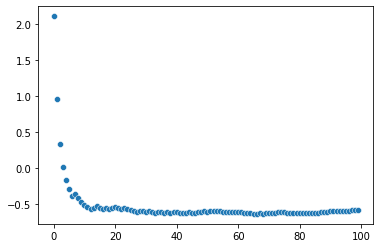

In [ ]:
## generate random vectors a and b 
a = generate()
b = generate()

all_vals = lyp_exp(a,b)
sns.scatterplot(x = range(len(all_vals)), y=all_vals)
plt.show()

### Training data 


We next generate a training data set. We generate $X$ and $y$ where $X$ consists of $\Vert a \Vert$, $\Vert b \Vert$ and $\langle a,b\rangle$. $y$ is basically the Lyaponov exponent. 

In [ ]:
X1, y1 = make_df(50)

### Training the model

We now perform a polynomial regression of columns of $X$. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 2
lgr = LinearRegression()
polyreg=PolynomialFeatures(degree)

df_poly1 = pd.DataFrame(polyreg.fit_transform(X1))
lgr.fit(df_poly1,y1)


# df_poly = df_poly.drop([0], axis=1)

LinearRegression()

### Testing 

We now generate a test data set. We observe that the model trained above performs very well on this unseen test data set. 

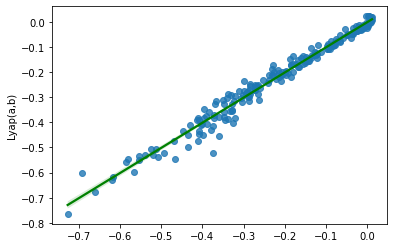

In [ ]:
import seaborn as sns 
X2, y2 = make_df(200)
df_poly2 = pd.DataFrame(polyreg.fit_transform(X2))
y2_pred = lgr.predict(df_poly2)
sns.regplot(x=y2_pred, y=y2,  line_kws={'color': 'green'});
# sns.scatterplot(x=y2_pred, y =y2)
plt.show()

### Conjecture

The following observation seems to hold for $m>2$ as well. Hence, for a given set of vectors $a_1, \cdots, a_m \mathbb{R}^d$, the Gram Schmidt matrix of $a_i$ would determin the Lyaponov exponent. 

Here are some major questions we need to answer before trying to think about this conjecture. 

1) Can we establish a reasonable termination criteria for computing the Lyaponv exponent? In our lyp_exp function, we only tried 100 iterations. This might be inaccurate. 

2) Does our conjecture trivially follow from some basic proof? 